<a href="https://colab.research.google.com/github/DurgaPrasadGanta/Projects/blob/master/Translated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install easyocr


SyntaxError: ignored

In [ ]:
pip install translate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


['Who We Are', 'Managing Money;', 'Making an Impact', "Let's invest to make a difference in your life and the lives of", 'others. Together we can become a powerful force for good.', 'Different Story', 'Ownership Structure', 'Corporate Responsibility', 'Prosper With Purpose@', 'Learn how our owner; the Stowers', 'Find out how we impact communities', 'When you invest with us for your', 'Institute for Medical Research,', 'through contributions of time and', 'financial future, you also invest in the', 'emboldens us to mana.', 'future of 0_'] ['Über uns', 'Leitung Ihres Geldes', 'Partnerschaften zeigen Wirkung', 'und dabei helfen, einen Unterschied&#x0A;im Leben anderer zu machen.', 'Unsere Liebe gesellt sich der euren hinzu, und gemeinsam sind wir zu einer mächtigen Kraft für das Gute geworden.', 'A DIFFERENT STORY', 'Eigentümerstruktur', 'Unternehmensverantwortung', 'Arbeit mit Sinn', 'Weitere Infos', 'So unterstützen wir', 'Investieren Sie mit uns', 'for Medical Research [für medizinisch

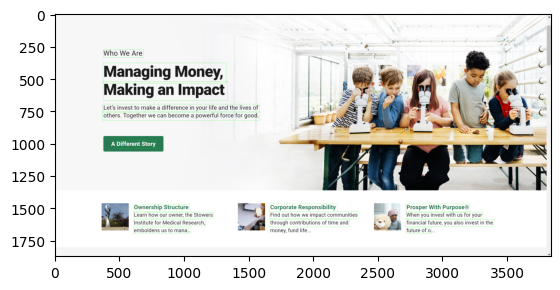

In [ ]:
from IPython.testing import test
import os
import cv2
import easyocr
import matplotlib.pyplot as plt
from torch.cuda import is_available
from translate import Translator


class Reader:
    def __init__(self, is_cuda=False):
        self.reader = easyocr.Reader(['en'], gpu=is_cuda, model_storage_directory=os.path.join('models'), download_enabled=True)

    def __call__(self, img):
        return self.extract_text(img)

    def extract_text(self, img, show_text=False, show_confidence=False):
        result = self.reader.readtext(img)

        extracted_text = []

        for text in filter(lambda x: x[-1] > .45, result):
            box, acc_text, confidence = text
            # box[0] and box[2] - upper left and lower right corners of the box
            img = cv2.rectangle(img, [int(i) for i in box[0]], [int(i) for i in box[2]], (0, 255, 0), 1) # each coordinate is a list has to be int

            if show_text and show_confidence:
                img_text = f'{acc_text} - ({"{:.3f}".format(confidence)}%)'

            elif show_text:
                img_text = acc_text

            elif show_confidence:
                img_text = f'CONF: ({"{:.3f}".format(confidence)}%)'

            if show_text or show_confidence:
                img = cv2.putText(
                    img, 
                    img_text, 
                    (int(box[0][0]), int(box[0][1] - 3)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 
                    fontScale=.5, 
                    color=(168, 90, 50),
                    thickness=2
                )
            
            extracted_text.append(acc_text)

        return extracted_text, img

# class GPT_3:
#     def __init__(self, api_key):
#         openai.api_key = api_key

#         self.completion = openai.Completion
#         self.options = {
#             'engine': 'text-davinci-002',
#             'temperature': 0.25,
#             'top_p': 1,
#             'frequency_penalty': 0,
#             'presence_penalty': 0,
#             'max_tokens': 512
#         }

#     def __call__(self, prompt, options=None):
#         return self.prediction(prompt, options)

#     def prediction(self, prompt, options=None):
#         if not options:
#             options = self.options

#         return self.completion.create(prompt=prompt, **options)['choices'][0]['text']

#     def summarize(self, text):
#         prompt = f'Try to summarize the following text as best you can!\n\n{text}'

#         return self.prediction(prompt=prompt)

def read_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return img
def translate_text(text_arr):
  translator=Translator(to_lang="German")
  translated_text=[]
  for text in text_arr:
    translation = translator.translate(text)
    translated_text.append(translation)
  print(text_arr,translated_text)
if __name__ == '__main__':
    #load_dotenv() # Load secrets
    
    reader = Reader(is_cuda=is_available())
    #gpt_3 = GPT_3(os.getenv('OPENAI_API_KEY'))
    
    img = read_img('/content/Capture.PNG')
    text, extracted_image = reader(img)
    text_array=text
    translate_text(text_array)
    text = ' '.join(text)

    print('Extracted_text')
    print(text)

    #summarization_result = gpt_3.summarize(text)

    print('Summarized text:')
    #print(summarization_result)
    
    plt.imshow(extracted_image)
    plt.show()